# Facebook Marketplace Recommendation Ranking System - EDA

## Library Imports & Import Data

In [70]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

from PIL import Image
from tqdm import tqdm

In [6]:
if not os.path.exists('./images_fb.zip'):
    !wget "https://aicore-files.s3.amazonaws.com/images_fb.zip"

--2022-10-28 16:12:35--  https://aicore-files.s3.amazonaws.com/images_fb.zip
Resolving aicore-files.s3.amazonaws.com (aicore-files.s3.amazonaws.com)... 52.217.85.12
Connecting to aicore-files.s3.amazonaws.com (aicore-files.s3.amazonaws.com)|52.217.85.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2550752631 (2.4G) [application/zip]
Saving to: ‘images_fb.zip’

images_fb.zip       100%[===================>]   2.38G  12.7MB/s    in 3m 59s  

2022-10-28 16:16:35 (10.2 MB/s) - ‘images_fb.zip’ saved [2550752631/2550752631]



In [2]:
images_df = pd.read_csv('Images.csv', lineterminator="\n")
images_df.head()

,Unnamed: 0,id,product_id
0,0,912bb259-3ad9-457b-9db1-ce1da9016057,5f5f57d7-778f-4336-bb10-b43863418c8c
1,1,b166d305-b852-4bdd-83f4-465b20da94fa,5f5f57d7-778f-4336-bb10-b43863418c8c
2,2,68f5a29d-0075-4d60-81c1-ab684a82e50c,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4
3,3,f6a309d7-d247-446a-9b5e-aceefdd4334d,c2c8949f-3cde-4651-a234-4a4a1b2a9ad4
4,4,2c2b3a6f-15b3-4289-937a-15482d9f5781,8292aa4e-7f1b-4655-bf0e-f1f2c9e3ffaf


In [3]:
products_df = pd.read_csv('Products.csv', lineterminator='\n')
products_df.head()

,Unnamed: 0,id,product_name,category,product_description,price,location
0,0,243809c0-9cfc-4486-ad12-3b7a16605ba9,"Mirror wall art | in Wokingham, Berkshire | Gu...","Home & Garden / Dining, Living Room Furniture ...","Mirror wall art. Posted by Nisha in Dining, Li...",£5.00,"Wokingham, Berkshire"
1,1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,"Stainless Steel Food Steamer | in Inverness, H...",Home & Garden / Other Household Goods,Morphy Richard’s (model no 48755)Stainless ste...,£20.00,"Inverness, Highland"
2,2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,"Sun loungers | in Skegness, Lincolnshire | Gum...",Home & Garden / Garden & Patio / Outdoor Setti...,I have 2 of these - collection only as I don’t...,£20.00,"Skegness, Lincolnshire"
3,3,59948726-29be-4b35-ade5-bb2fd7331856,Coffee side table from Ammunition ammo box hai...,"Home & Garden / Dining, Living Room Furniture ...",Great reclaimed army ammunition box used as co...,£115.00,"Radstock, Somerset"
4,4,16dbc860-696e-4cda-93f6-4dd4926573fb,Modern Shannon Sofa for sale at low cost | in ...,"Home & Garden / Dining, Living Room Furniture ...",New Design Shannon Corner sofa 5 Seater Avail...,£450.00,"Delph, Manchester"


### Have a look at an image

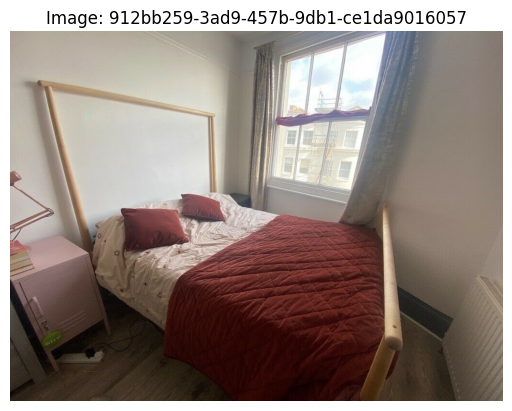

In [16]:
first_id = images_df.id[0]
with ZipFile('./images_fb.zip') as myzip:
    image = myzip.open(f"images/{first_id}.jpg")
img = mpimg.imread(image)
plt.imshow(img)
plt.axis('off');
plt.title(f'Image: {first_id}');

## Clean the tabular data

In [24]:
products_df[products_df.price.str.contains('£')].price.count()

7156

In [34]:
def clean_tabular_data(df):
    return (df.drop(columns='Unnamed: 0')
                .assign(price = df.price.str.replace(',',''))
                .assign(price = lambda df_: df_.price.str.extract(r'£([\d]+.[\d]+)').astype('float'))
    )

clean_tabular_data(products_df)[clean_tabular_data(products_df).price.mod(1) != 0]

,id,product_name,category,product_description,price,location
48,45acbefc-7f24-41ff-af59-374c13b8d9b6,**100% GUARANTEED PRICE!**BRAND NEW-Double Bed...,Home & Garden / Beds & Bedroom Furniture / Dou...,****Please click ;See all ads; on Right top Co...,189.99,"Acton, London"
205,0201baec-ff67-4496-a01c-39e1c3779ca1,"🔥Brand New Wardrobe Sets, Top Quality and Full...",Home & Garden / Beds & Bedroom Furniture / War...,Fully assembled wardrobe sets available in var...,39.99,"Liverpool City Centre, Merseyside"
236,94a34ffd-e6a3-4b31-9ec6-10d20920d671,"House moving supplies, boxes, bubble wrap, tap...",Home & Garden / Other Household Goods,House moving ? Packing ? A range of packaging ...,0.78,"Tonbridge, Kent"
429,126a1fd9-a27c-49a6-be78-dc20f2f8bff5,Free Dining table - Cambridge Re-Use Ref 517.2...,"Home & Garden / Dining, Living Room Furniture ...",L110 W110 H73Free Delivery starts from £10Camb...,0.01,"Cambridge, Cambridgeshire"
442,a9071e3e-41c7-4ff4-bc36-6e417ac0b2e6,"Single Bed | in Oldmeldrum, Aberdeenshire | Gu...",Home & Garden / Beds & Bedroom Furniture / Sin...,Single Divan BedHardly been used as been in a ...,0.01,"Oldmeldrum, Aberdeenshire"
...,...,...,...,...,...,...
6917,5d1de8c9-ca04-47e5-b0d1-481abe8d0fd6,"Swap Wii U games | in Oldmeldrum, Aberdeenshir...",Video Games & Consoles / Consoles / Nintendo W...,Looking to swap for Xbox One or other consoles...,11.11,"Oldmeldrum, Aberdeenshire"
6935,a9e31ee1-c706-42a9-97d9-4ca257e4c6f3,"Nintendo wii | in Harrow, London | Gumtree",Video Games & Consoles / Consoles / Nintendo Wii,Nintendo Wii with 5 games. No longer required ...,55.50,"Harrow, London"
6993,7c2a5053-930a-4fa5-bd3b-dbbf10edd0b9,"Xbox Series S White | in Finchley, London | Gu...",Video Games & Consoles / Consoles / Xbox One,Item is preowned & in working condition. May c...,169.99,"Finchley, London"
7031,ebe8d613-4aa0-477c-8f1a-256ff8d4f248,Microsoft - 512GB SSD Xbox Series S White | in...,Video Games & Consoles / Consoles / Xbox One,Model Name: Xbox Series S\r Brand: Microsoft -...,179.99,"Blackburn, Lancashire"


In [35]:
tweaked_products_df = clean_tabular_data(products_df)

## Clean images

In [57]:
with ZipFile('./images_fb.zip') as myzip:
    img_filenames = myzip.namelist()

img_filenames.remove('images/')
img_filenames.remove('images/Links.csv')
n_imgs = len(img_filenames)
n_imgs

12668

In [77]:
with ZipFile('./images_fb.zip') as myzip:
    image = myzip.open(img_filenames[0])
    im = Image.open(image)
    mode = im.mode

mode

'RGB'

In [86]:
img_info = {'img_id': [], 'size_x': [], 'size_y': [], 'channels': []}

with ZipFile('./images_fb.zip') as myzip:
    for img_filename in tqdm(img_filenames):
        image = myzip.open(img_filename)
        im = Image.open(image)
        x, y = im.size
        img_info['img_id'].append(img_filename)
        img_info['size_x'].append(x)
        img_info['size_y'].append(y)
        img_info['channels'].append(im.mode)
        

img_info_df = pd.DataFrame(img_info)

100%|██████████| 12668/12668 [00:14<00:00, 899.51it/s] 


In [88]:
img_info_df = (img_info_df.assign(ratio = img_info_df.size_x.div(img_info_df.size_y),
                                    img_id = img_info_df.img_id.str.extract(r'images/([\d\w-]+).jpg')))
img_info_df.head()

,img_id,size_x,size_y,channels,ratio
0,00234e78-17b3-49c0-96c7-b6d58ee9a874,389,800,RGB,0.486250
1,0134d871-1c94-4394-904b-967ad1b67c62,1024,1024,RGB,1.000000
2,013c29b5-2c61-45aa-815c-09623c52cb1e,1024,768,RGB,1.333333
3,01c12a50-63b6-48bc-be18-ef8f3c2b198a,743,800,RGB,0.928750
4,01f600e5-7e05-4c60-9259-1670e6b31bb4,768,1024,RGB,0.750000


In [89]:
img_info_df.channels.value_counts()

RGB     12626
RGBA       17
P          15
L          10
Name: channels, dtype: int64

In [101]:
P_channel_idxs = img_info_df.query("channels == 'P'").img_id.index.to_list()
L_channel_idxs = img_info_df.query("channels == 'L'").img_id.index.to_list()
RGBA_channel_idxs = img_info_df.query("channels == 'RGBA'").img_id.index.to_list()

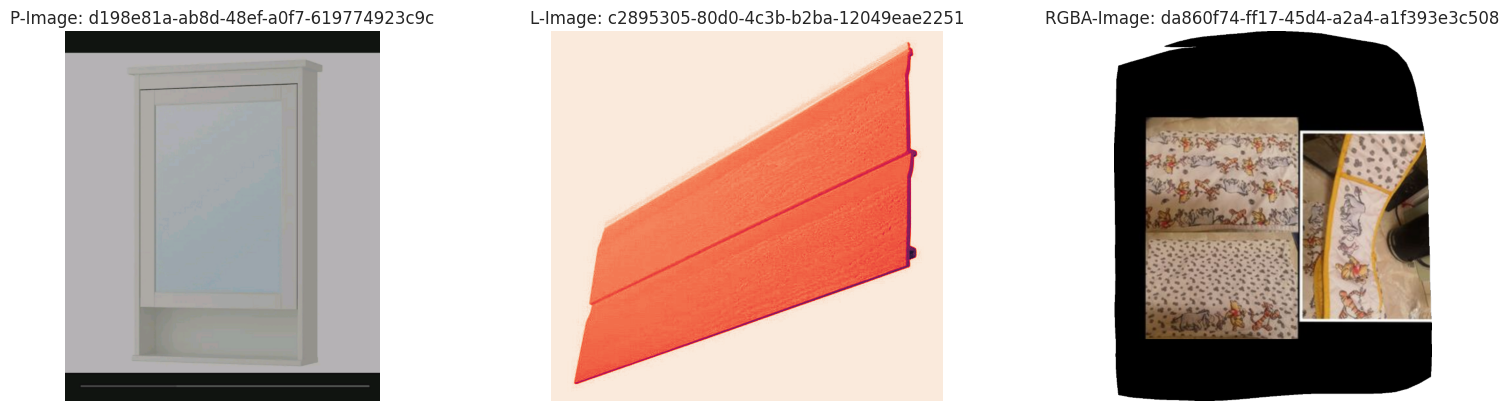

In [105]:
fig, ax = plt.subplots(1,3, figsize = (19.2, 4.8))

img_id_p_channel = img_info_df.img_id[P_channel_idxs[0]]
img_id_l_channel = img_info_df.img_id[L_channel_idxs[0]]
img_id_rgba_channel = img_info_df.img_id[RGBA_channel_idxs[0]]

with ZipFile('./images_fb.zip') as myzip:
    image_1 = myzip.open(f"images/{img_id_p_channel}.jpg")
    image_2 = myzip.open(f"images/{img_id_l_channel}.jpg")
    image_3 = myzip.open(f"images/{img_id_rgba_channel}.jpg")
img = mpimg.imread(image_1)
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title(f'P-Image: {img_id_p_channel}')
img = mpimg.imread(image_2)
ax[1].imshow(img)
ax[1].axis('off')
ax[1].set_title(f'L-Image: {img_id_l_channel}')
img = mpimg.imread(image_3)
ax[2].imshow(img)
ax[2].axis('off')
ax[2].set_title(f'RGBA-Image: {img_id_rgba_channel}');

In [106]:
img_info_df.size_x.mean(), img_info_df.size_y.mean()

(791.0762551310388, 859.937006630881)

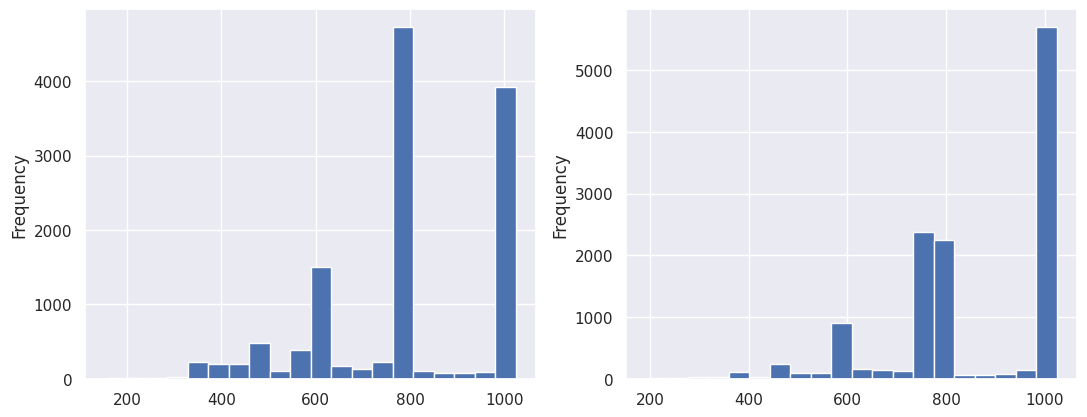

In [122]:
fig, ax = plt.subplots(1,2, figsize=(12.8, 4.8))
img_info_df.size_x.plot.hist(bins=20, ax=ax[0])
img_info_df.size_y.plot.hist(bins=20, ax=ax[1]);

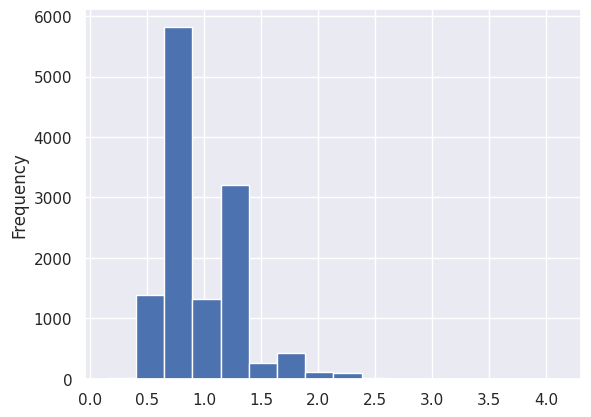

In [123]:
img_info_df.ratio.plot.hist(bins=16);

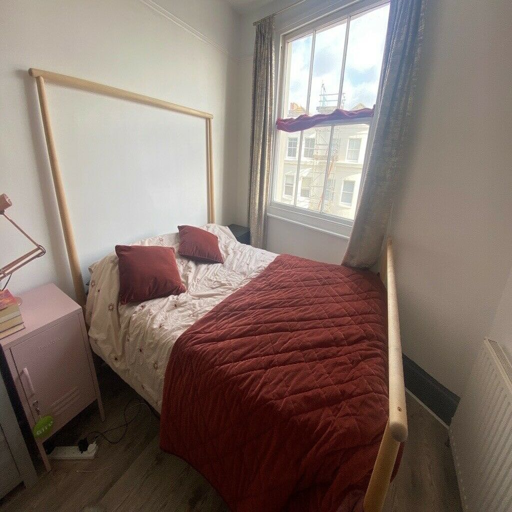

In [114]:
def resize_image(im, final_size=512):
    im = im.resize((final_size, final_size))
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return im

with ZipFile('./images_fb.zip') as myzip:
    img = myzip.open(f"images/{first_id}.jpg")

resize_image(Image.open(img))

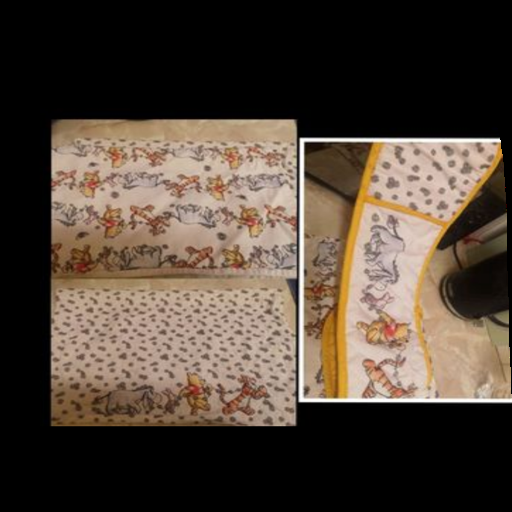

In [120]:
with ZipFile('./images_fb.zip') as myzip:
    img = myzip.open(f"images/{img_id_rgba_channel}.jpg")

resize_image(Image.open(img))

In [128]:
if not os.path.exists('./cleaned_images'):
    os.makedirs('./cleaned_images')

with ZipFile('./images_fb.zip') as myzip:
    for img_filename in tqdm(img_filenames):
        image = myzip.open(img_filename)
        im = resize_image(Image.open(image))
        im.save(f'./cleaned_images/{img_filename[7:]}')


100%|██████████| 12668/12668 [09:38<00:00, 21.89it/s]
